In [110]:
from Engine.Tools import phiFunction, relativeAngle, distanceCalc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from itertools import product
import numpy as np
import random

In [111]:
# Simulation setup
random.seed(123)
N: int = 1000                                                          # Simulation size
Lag: int = 1                                                           # Lag value in the model
Phi: float = 0.35
Rho: float = 0.5
timeInterval: int = 1
meanPol: float = 10.0

In [112]:
# Geographical setup
GridSize: list = [x for x in range(-1, 2)]                                           # Size of the geographical grid for the simulation
Distance: float = 10.0                                                               # in Km
Location: dict = {i: x for i, x in enumerate(list(product(GridSize, repeat=2)))}     # Dictionary of coordinates for each integer-valued intersection point in the grid

In [113]:
# Environmental Setup
# windSpeed: np.ndarray = np.clip(np.random.normal(loc=30.0, scale=10.0, size=[N]), 1.0, np.inf)               # Random non-negative wind speed
windSpeed: np.ndarray = np.ones(shape=N) * 20

In [114]:
# windDirection: np.ndarray = np.degrees(np.arccos(np.cos(np.linspace(0, 2 * np.pi, N, endpoint=False))))    # Sequential wind direction 
windDirection: np.ndarray = np.random.uniform(low=0, high=360, size=[N])                                   # Random wind direction 

In [115]:
# Simulating variables
K: int = len(GridSize) ** 2
initialPollution: float = np.random.normal(loc=50, scale=2.5, size=[1, K])    

# Computing the Phi function values
W: np.ndarray = np.zeros((N, K, K))
for k in range(N):
    for pair in product(list(Location.keys()), repeat=2):
        i, j = pair
        W[k, i, j] = 0 if i == j else phiFunction(
            phi=Phi,
            rho=Rho,
            distance=distanceCalc(coordinateA=Location[i], coordinateB=Location[j], unit=Distance),
            n=timeInterval,
            velocity=windSpeed[k],
            angle=relativeAngle(coordinateA=Location[i], coordinateB=Location[j], windDir=windDirection[k]),
            lag=Lag
        )
    rowNorms: np.ndarray = np.linalg.norm(W[k, :, :], axis=1)
    rowNorms[rowNorms == 0] = 1
    W[k, :, :] = W[k, :, :] / rowNorms[:, np.newaxis]

In [116]:
# Random initial pollution level
Y: np.ndarray = np.zeros([N, K])
Y[0, :] = meanPol + initialPollution
for i in range(1, N):
    Y[i, :] = meanPol + W[i, :, :] @ Y[i-1, :].transpose() + np.random.normal(loc=0, scale=1, size=[1, K])

In [117]:
Y

array([[61.4058273 , 58.29216708, 63.12273407, ..., 58.11316332,
        56.91871626, 57.05785022],
       [ 9.47065163, 10.17011696, 10.26219601, ..., 10.65555902,
        74.22094883, 10.04734639],
       [79.81994677, 43.69323228, 80.34794462, ..., 74.96066845,
        35.56723225, 75.76064044],
       ...,
       [32.32570396, 30.80125143, 29.66807337, ..., 31.16582492,
        34.26462067, 31.47138029],
       [53.72671725, 70.85082452, 54.85075467, ..., 65.24680461,
        78.0711269 , 66.96179869],
       [10.13963889,  7.94955778,  9.4265559 , ...,  7.84727156,
        10.57049255,  9.28278857]])

/var/folders/7f/x1mp2wjd10vcy_krqb5_kwjc0000gn/T/ipykernel_16808/2062200356.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


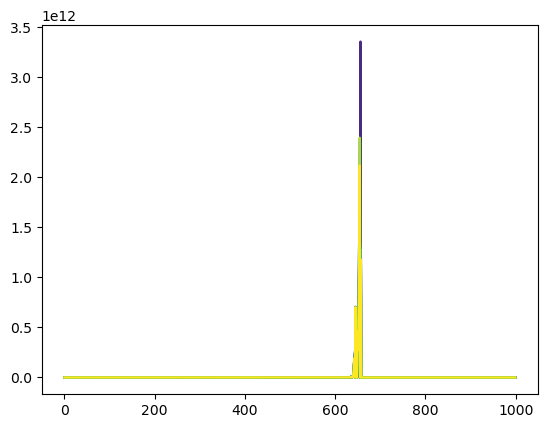

In [118]:
fig, ax = plt.subplots()

# Get a color map
cmap = cm.get_cmap('viridis')

# Generate colors from the color map
colors = [cmap(i) for i in np.linspace(0, 1, Y.shape[1])]

# Plot each column with a unique color
for i in range(Y.shape[1]):
    ax.plot(Y[:, i], color=colors[i])

plt.show()